In [8]:
import pandas as pd

import report_util
import tables

times = [pd.to_timedelta(5, 'm'), pd.to_timedelta(3, 'h')]
defect = tables.create_defect_table(report_util.read_timedelta_csv('../data/detections.csv'), times)
defect

In [9]:
print(defect.to_latex(multicol_align='c', hrules=True, multirow_align='t', convert_css=True))

\begin{table}
\caption{Defect Detection Rates.}
\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{2}{c}{B0} & \multicolumn{2}{c}{B1} & \multicolumn{2}{c}{C0} & \multicolumn{2}{c}{C1} & \multicolumn{2}{c}{N0} & \multicolumn{2}{c}{N1} & \multicolumn{2}{c}{N2} & \multicolumn{2}{c}{R0} & \multicolumn{2}{c}{R1} & \multicolumn{2}{c}{R2} & \multicolumn{2}{c}{R3} & \multicolumn{2}{c}{R4} \\
 & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H \\
Fuzzer &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
BeDiv-Simple & 0.00 & 0.65 & {\cellcolor{yellow}} 0.00 & 0.00 & 0.00 & \color{red} 0.05 & 0.15 & {\cellcolor{yellow}} 1.00 & 0.00 & \color{red} 0.00 & {\cellcolor{yellow}} 0.00 & 0.00 & {\cellcolor{yellow}} 0.00 & \color{red} 0.00 & {\cellcolor{yellow}} 0.00 & \color{red} 0.00 & 0.05 & 0.45 & {\cellcolor{yellow}} 0.00 & \color{red} 0.00 & {\cellcolor{yellow}} 1.00 & {\cellcolor{

In [10]:
coverage = tables.create_coverage_table(report_util.read_timedelta_csv('../data/coverage.csv'), times)
coverage

In [11]:
print(coverage.to_latex(multicol_align='c', hrules=True, multirow_align='t', convert_css=True))

\begin{table}
\caption{Branch Coverage.}
\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{2}{c}{Ant} & \multicolumn{2}{c}{Bcel} & \multicolumn{2}{c}{Closure} & \multicolumn{2}{c}{Maven} & \multicolumn{2}{c}{Nashorn} & \multicolumn{2}{c}{Rhino} & \multicolumn{2}{c}{Tomcat} \\
 & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H & 5M & 3H \\
Fuzzer &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
BeDiv-Simple & \color{red} 755.0 & \color{red} 899.0 & \color{red} 1435.5 & \color{red} 1846.5 & \color{red} 9328.0 & \color{red} 11863.5 & \color{red} 590.5 & \color{red} 738.0 & \color{red} 3008.5 & \color{red} 3319.5 & \color{red} 2952.0 & \color{red} 3235.5 & \color{red} 274.5 & 341.0 \\
BeDiv-Struct & \color{red} 786.5 & \color{red} 896.5 & \color{red} 1412.5 & \color{red} 1876.5 & \color{red} 9336.5 & \color{red} 11904.5 & \color{red} 578.5 & \color{red} 641.5 & \color{red} 2993.5 & \color{red} 3092.0 & \color{red} 2915.5 & \color{red} 3237.0 & \color{red} 161.0 & \co

In [12]:
heritability = tables.create_heritability_table(pd.read_csv('../data/heritability.csv'))
heritability

In [13]:
print(heritability.to_latex(multicol_align='c', hrules=True, multirow_align='t', convert_css=True))

\begin{table}
\caption{Heritability Metrics.}
\begin{tabular}{lrrrrrr}
\toprule
 & \multicolumn{2}{c}{Linked} & \multicolumn{2}{c}{One Point} & \multicolumn{2}{c}{Two Point} \\
 & HY & IR & HY & IR & HY & IR \\
Subject &  &  &  &  &  &  \\
\midrule
Ant & {\cellcolor{yellow}} 0.561 & {\cellcolor{yellow}} 0.923 & \color{red} 0.459 & \color{red} 0.124 & \color{red} 0.493 & \color{red} 0.069 \\
Bcel & 0.283 & {\cellcolor{yellow}} 0.512 & \color{red} 0.660 & \color{red} 0.347 & {\cellcolor{yellow}} \color{red} 0.756 & \color{red} 0.286 \\
Closure & {\cellcolor{yellow}} 0.742 & {\cellcolor{yellow}} 0.717 & \color{red} 0.661 & \color{red} 0.101 & 0.712 & \color{red} 0.094 \\
Maven & {\cellcolor{yellow}} 0.446 & {\cellcolor{yellow}} 0.589 & 0.404 & \color{red} 0.497 & 0.399 & \color{red} 0.453 \\
Nashorn & {\cellcolor{yellow}} 0.622 & {\cellcolor{yellow}} 0.646 & \color{red} 0.548 & \color{red} 0.117 & 0.591 & \color{red} 0.132 \\
Rhino & 0.611 & {\cellcolor{yellow}} 0.502 & 0.599 & \color{red

Creating plot for Ant


FileNotFoundError: [Errno 2] No such file or directory: 'out/Ant.pdf'

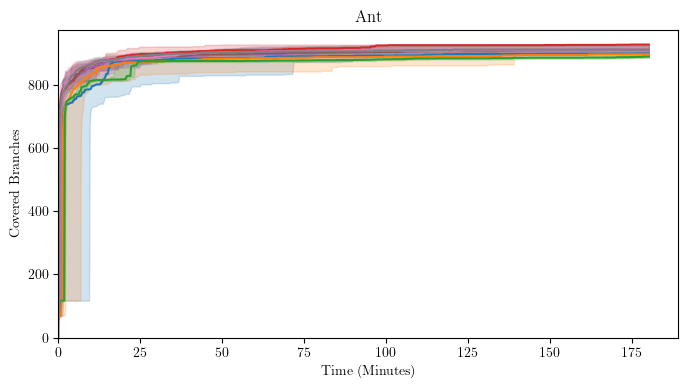

In [14]:
import os
import coverage_section
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

output_dir = 'out'
os.makedirs(output_dir, exist_ok=True)
raw_coverage = report_util.read_timedelta_csv('../data/coverage.csv')
subjects = sorted(raw_coverage['subject'].unique())
fuzzers = sorted(raw_coverage['fuzzer'].unique())
colors = [k for k in mcolors.TABLEAU_COLORS]
cmap = {k[0]: k[1] for k in zip(fuzzers, colors)}
for subject in subjects:
    print(f'Creating plot for {subject}')
    fig = coverage_section.plot(raw_coverage, subject, cmap=cmap)
    report_util.fig_to_pdf(os.path.join(output_dir, f'{subject}.pdf'), fig)
    plt.close()